In [1]:
import pandas as pd
import numpy as np

**Question 1**

In [2]:
# importing dataset and assigning it to variable

users=pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
# mean age per occupation

occupation_mean=users.groupby('occupation').age.mean()
occupation_mean

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
# male ratio per occupation (most to least)

x = users.pivot_table(index='occupation', columns='gender', aggfunc='size')
s = x[['F', 'M']].sum(axis=1)
x['ratio'] = x['M'] / s
occupation_ratio = x.sort_values(by='ratio', ascending = False)
print(occupation_ratio)

gender            F      M     ratio
occupation                          
doctor          NaN    7.0  1.000000
engineer        2.0   65.0  0.970149
technician      1.0   26.0  0.962963
retired         1.0   13.0  0.928571
programmer      6.0   60.0  0.909091
executive       3.0   29.0  0.906250
scientist       3.0   28.0  0.903226
entertainment   2.0   16.0  0.888889
lawyer          2.0   10.0  0.833333
salesman        3.0    9.0  0.750000
educator       26.0   69.0  0.726316
student        60.0  136.0  0.693878
other          36.0   69.0  0.657143
marketing      10.0   16.0  0.615385
writer         19.0   26.0  0.577778
none            4.0    5.0  0.555556
administrator  36.0   43.0  0.544304
artist         13.0   15.0  0.535714
librarian      29.0   22.0  0.431373
healthcare     11.0    5.0  0.312500
homemaker       6.0    1.0  0.142857


In [10]:
# minimum and maximum ages for each occupation

print('Minimum Age')
print('------- \n')
print(users.groupby('occupation').age.min(),'\n')


print('Maximum Age')
print('------- \n')
print(users.groupby('occupation').age.max())

Minimum Age
------- 

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64 

Maximum Age
------- 

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64


In [11]:
# percentage of women and men for each occupation

grp_occupGender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
grpcount = users.groupby(['occupation']).count()
occupGender = grp_occupGender.div(grpcount, level = "occupation")
occupGender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

**Question 2**

In [ ]:
import pandas as pd
import numpy as np

In [12]:
#Dataset read
euro12=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [13]:
# selecting goal column
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [17]:
# team in Euro2012

print('Number of teams in Euro 2012 :', euro12.Team.nunique())

Number of teams in Euro 2012 : 16


In [18]:
# number of columns

print('Number of columns in Euro2012 dataset :', euro12.shape[1])

Number of columns in Euro2012 dataset : 35


In [19]:
# columns Team, Yellow Cards and Red Cards asigned to dataframe called discipline

discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [20]:
# sorting by Red Card

red=euro12.sort_values(by='Red Cards',ascending=False)
red

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19


In [21]:
# sorting by Yellow Card

yellow=euro12.sort_values(by='Yellow Cards',ascending=False)
yellow

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
10,Portugal,6,22,42,34.3%,9.3%,82,6,0,0,...,10,71.5%,73,90,10,12,0,14,14,16
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17
14,Sweden,5,17,19,47.2%,13.8%,39,3,0,0,...,8,61.6%,35,51,7,7,0,9,9,18
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
11,Republic of Ireland,1,7,12,36.8%,5.2%,28,0,0,0,...,17,65.4%,43,51,11,6,1,10,10,17


In [22]:
# mean of yellow cards per team

euro12.rename(columns = {'Yellow Cards':'Yellow_Cards', 'Red Cards':'Red_Cards'}, inplace = True)
euro12.groupby('Team').Yellow_Cards.mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow_Cards, dtype: float64

In [23]:
# teams that scored more than 6 goals
sixGoalsPlus=euro12[(euro12['Goals']>6)]
print(sixGoalsPlus['Team'])

5     Germany
13      Spain
Name: Team, dtype: object


In [24]:
# team names that start with G

teamNames=euro12[euro12.Team.str.startswith('G')]
print(teamNames['Team'])

5    Germany
6     Greece
Name: Team, dtype: object


In [25]:
#  first 7 columns

euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [26]:
# all columns except last three

euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow_Cards,Red_Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [27]:
# shooting accuracy of England, Italy and Russia

p=euro12[['Team','Shooting Accuracy']]
shootingAccuracy=p[(p['Team']=='England')|(p['Team']=='Italy')|(p['Team']=='Russia')]
shootingAccuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


**Question 3**

In [28]:
import pandas as pd
import numpy as np
import random

In [29]:
A = pd.Series(np.random.randint(1,5,100))
B = pd.Series(np.random.randint(1,4,100))
C = pd.Series(np.random.randint(10000,30000,100))
SC = pd.concat([A,B,C],axis=1)
SC.head()

,0,1,2
0,3,2,26036
1,2,1,17611
2,2,1,24797
3,1,1,14858
4,2,3,14555


In [30]:
# 3 differents series with length of 100

p = pd.Series(np.random.randint(1,5,100))
q = pd.Series(np.random.randint(1,4,100))
r = pd.Series(np.random.randint(10000,30000,100))

In [31]:
# dataframe joining series by column

dataframe = pd.concat([p,q,r],axis=1)
dataframe.head()

,0,1,2
0,1,2,19644
1,4,3,16608
2,2,3,19330
3,1,1,28623
4,4,2,10804


In [32]:
# changing  name of columns

dataframe.columns = ['bedrs','bathrs','price_sqr_meter']
dataframe.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,19644
1,4,3,16608
2,2,3,19330
3,1,1,28623
4,4,2,10804


In [33]:
# creating new one column dataframe with values of 3 Series and assigning it to bigcolumn

bigcolumn = pd.concat([p,q,r],axis=0)
bigcolumn

0         1
1         4
2         2
3         1
4         4
      ...  
95    13583
96    25769
97    21407
98    19149
99    14612
Length: 300, dtype: int32

**Ops it seems it is going only until index 99. Is it true?**

**It shows only till 99, but the actual length is larger than 99**

In [112]:
len(bigcolumn)

300

In [34]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

0          1
1          4
2          2
3          1
4          4
       ...  
295    13583
296    25769
297    21407
298    19149
299    14612
Length: 300, dtype: int32

**Question 6**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
reading_file=pd.read_csv(r"us-marriages-divorces.csv", index_col=0)
#reading_file

Text(0, 0.5, 'Count of Mariages and Divorces per capita')

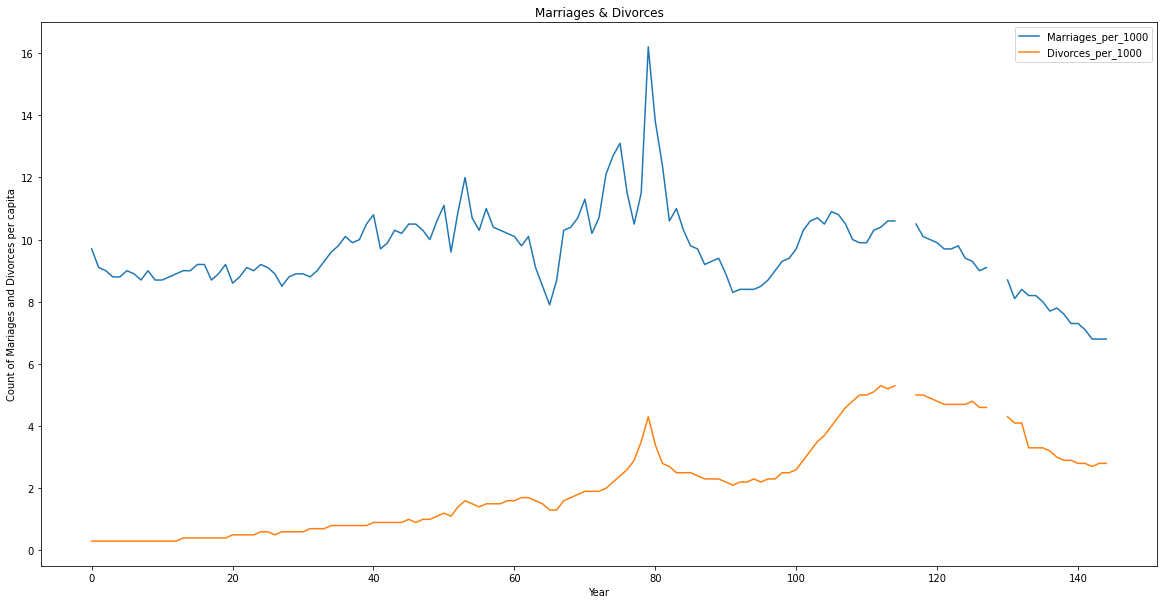

In [39]:
columns = reading_file.columns.drop(['Population','Marriages','Divorces'])
x_axis = range(0, reading_file.shape[0])
fig, fig1 = plt.subplots(figsize=(20,10))
for column in columns:
    fig1.plot(x_axis, reading_file[column])
    fig1.set_title('Marriages & Divorces')
fig1.legend(columns)
fig1.set_xlabel("Year")
fig1.set_ylabel("Count of Mariages and Divorces per capita")

**Question 8**

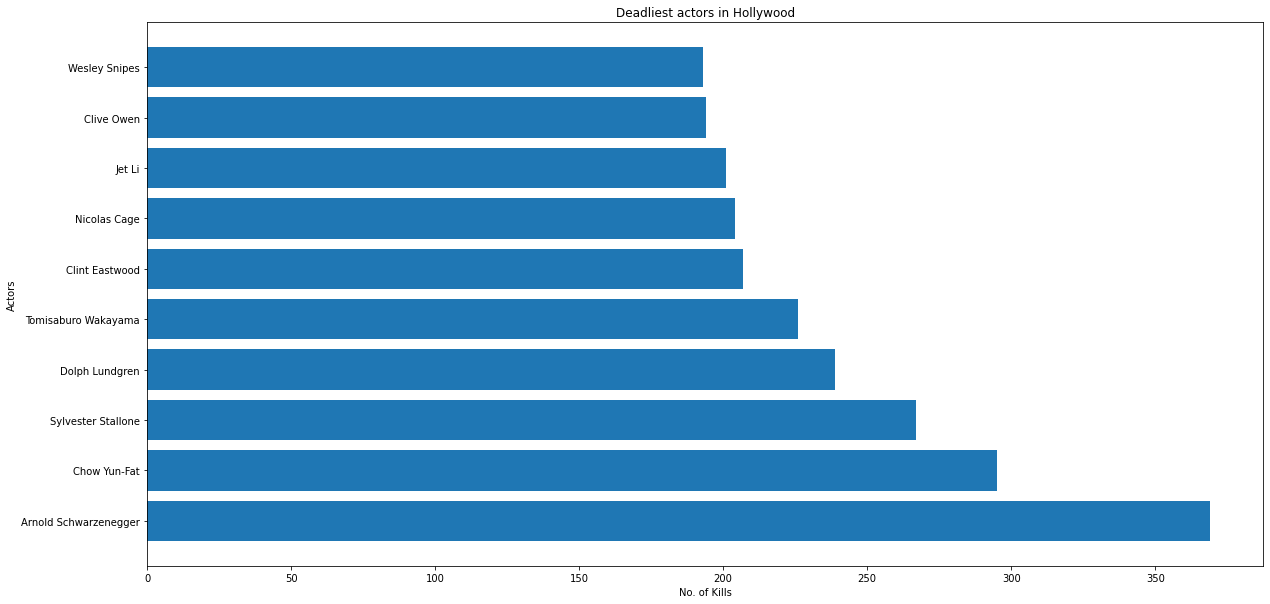

In [43]:
actor = pd.read_csv('actor_kill_counts.csv')
actorKill_sorted = actor.sort_values('Count',ascending = False)
fig = plt.subplots(figsize=(20, 10))

xAxis = actorKill_sorted['Actor']
yAxis = actorKill_sorted['Count']
plt.barh(xAxis,yAxis)

plt.ylabel("Actors")
plt.xlabel("No. of Kills") 
plt.title("Deadliest actors in Hollywood")
plt.show()

**Question 10**

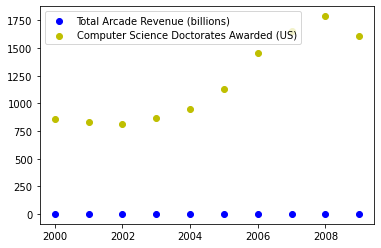

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

arcadeRevenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv', encoding='latin1')

plt.scatter(arcadeRevenue['Year'], arcadeRevenue['Total Arcade Revenue (billions)'], color='b', label='Total Arcade Revenue (billions)')
plt.scatter(arcadeRevenue['Year'], arcadeRevenue['Computer Science Doctorates Awarded (US)'], color='y', label='Computer Science Doctorates Awarded (US)')
plt.legend()
plt.show()